# Corner Detection and Finding Intrinsic and ExTrinsic Parameter

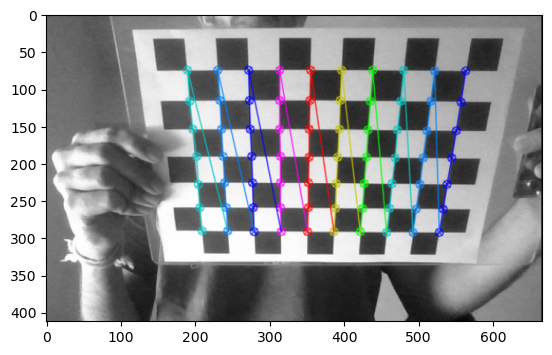

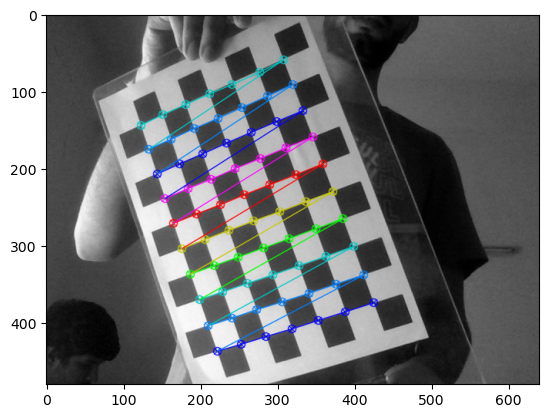

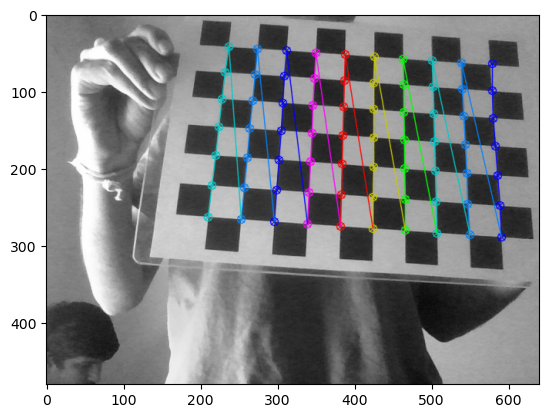

In [9]:
import numpy as np
import cv2
import glob
from google.colab.patches import cv2_imshow

num_corners = (7, 10)
objp = np.zeros((num_corners[0] * num_corners[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:num_corners[0], 0:num_corners[1]].T.reshape(-1, 2)

obj_points = []
img_points = []

calibration_images = glob.glob('*.png')
images = []
for fname in calibration_images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, num_corners, None)
    if ret == True:
        obj_points.append(objp)
        img_points.append(corners)
        images.append(img.copy())
        # Draw and display the corners
        cv2.drawChessboardCorners(img, num_corners, corners, ret)
        cv2_imshow( img)        
cv2.destroyAllWindows()

# Calibrate the camera
ret, camera_matrix, distortion_coefficients, rotation_vectors, translation_vectors = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)

# Print the camera matrix and distortion coefficients
print("Camera matrix:\n", camera_matrix)
print("Distortion coefficients: ", distortion_coefficients.ravel())

# Save the camera matrix and distortion coefficients to a file
np.savez('calibration_data.npz', camera_matrix=camera_matrix, distortion_coefficients=distortion_coefficients)



# focal length A, focal length B, principal translation A, principal translation B, skew parameter 

In [ ]:
print(f'focal length A {camera_matrix[0][0]} , focal length B {camera_matrix[1][1]},\nprincipal translation A {camera_matrix[0][2]}, principal translation B {camera_matrix[1][2]}\nskew parameter {camera_matrix[0][1]}')

focal length A 610.0193967628483 , focal length B 611.3170534170625,
principal translation A 306.97898795070836, principal translation B 240.7473340378587
skew parameter 0.0


In [ ]:
print(f'The re-projection error ret is {ret}')

The re-projection error ret is 0.4616849181552404


# Rotation_Vectors & Translation_Vectors

In [ ]:
for c,(i,j) in enumerate(zip(rotation_vectors,translation_vectors)):
  print(f'For image {c} \nRotational vector\n {cv2.Rodrigues(i)[0]} \nTranslationl vector\n {j}')
  print()


For image 0 
Rotational vector
 [[-0.05340339 -0.98924165 -0.13619484]
 [ 0.9847283  -0.07480361  0.15720877]
 [-0.16570533 -0.12571944  0.97812901]] 
Translationl vector
 [[-1.04242857]
 [-7.47331962]
 [29.88558085]]

For image 1 
Rotational vector
 [[-0.06699394 -0.99767436 -0.01255695]
 [ 0.95957203 -0.06787338  0.27315697]
 [-0.27337399  0.00625056  0.96188752]] 
Translationl vector
 [[ 7.12010452]
 [-4.6223516 ]
 [15.79638496]]

For image 2 
Rotational vector
 [[-0.01288505 -0.99917713 -0.03845839]
 [ 0.96122357 -0.02297314  0.27481171]
 [-0.27546908 -0.03342615  0.96072862]] 
Translationl vector
 [[ 9.7839557 ]
 [ 3.26800602]
 [28.93646077]]

For image 3 
Rotational vector
 [[ 0.0086493  -0.72722589 -0.68634372]
 [ 0.98038539  0.14131838 -0.13738122]
 [ 0.19690016 -0.6716931   0.71418394]] 
Translationl vector
 [[ 1.85346207]
 [-4.48144203]
 [19.56727816]]

For image 4 
Rotational vector
 [[-0.01855688 -0.98941978  0.14388936]
 [ 0.9983206  -0.02623513 -0.05164968]
 [ 0.05487817 

# Distortion_Coefficients

Distortioncoefficients=(k1, k2, p1, p2, k3)

In [ ]:
distortion_coefficients

array([[-0.20388688,  0.69998879,  0.00091519,  0.00113226, -0.86221379]])

In [ ]:
print(f"k1,k2,k3 -- {distortion_coefficients[0][0]}, {distortion_coefficients[0][1]}, {distortion_coefficients[0][-1]}")

k1,k2,k3 -- -0.20388688056013352, 0.6999887867696829, -0.862213789903084


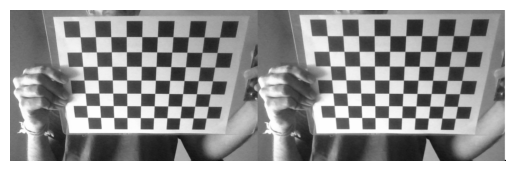

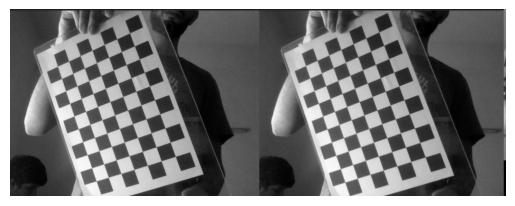

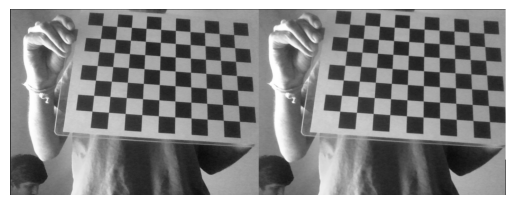

In [14]:
for fname in calibration_images:
    fname = cv2.imread(fname)
    img = cv2.cvtColor(fname, cv2.COLOR_BGR2GRAY)
    undistorted_img = cv2.undistort(img, camera_matrix, distortion_coefficients)
    
    # Display the original and undistorted images
    
    cv2_imshow(np.hstack([img,undistorted_img]))
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# ReprojectionErrors

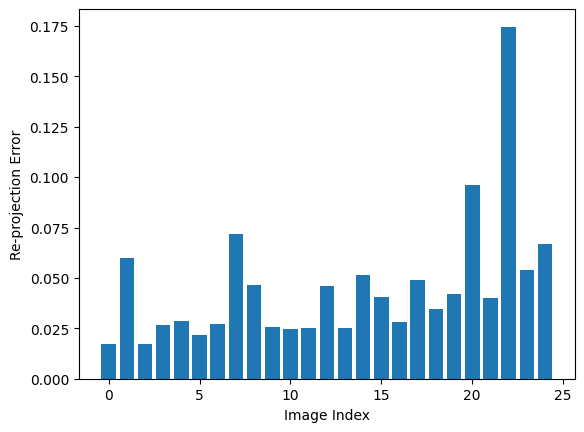

Mean re-projection error: 0.04556866091006639
Std re-projection error: 0.0322447138229787


In [ ]:
import matplotlib.pyplot as plt

reprojectionErrors = []
for i in range(25):
    projected_image_points, _ = cv2.projectPoints(obj_points[i], rotation_vectors[i], translation_vectors[i], camera_matrix, distortion_coefficients)
    reprojectionError = cv2.norm(img_points[i], projected_image_points, cv2.NORM_L2) / len(projected_image_points)

    reprojectionErrors.append(np.mean(reprojectionError))

# plot a bar chart of the re-projection errors
plt.bar(range(25), reprojectionErrors)
plt.xlabel('Image Index')
plt.ylabel('Re-projection Error')
plt.show()

# report the mean and standard deviation of the re-projection errors across all images
print(f"Mean re-projection error: {np.mean(reprojectionErrors)}")
print(f"Std re-projection error: {np.std(reprojectionErrors)}")
    # Print the re-projection error for the image
#proj_error.append(reprojection_error)
#print('Re-projection error for image:', reprojection_error)

# Projection ReProjection

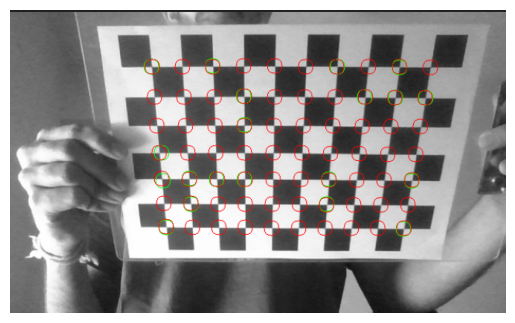

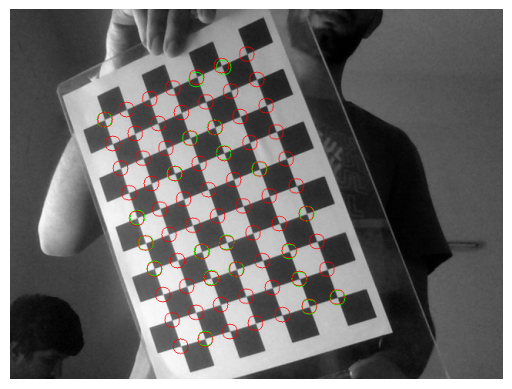

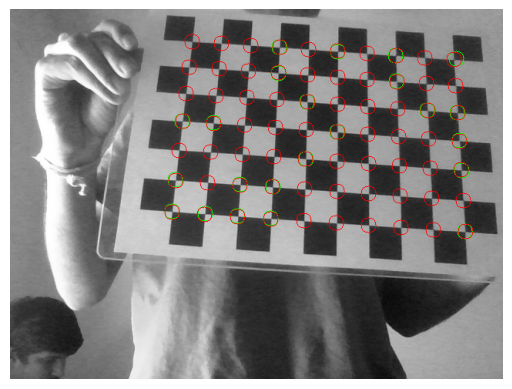

In [20]:
def plotc(img,img_p,reimg_p):
  for i in range(len(img_p)):
      p1 = tuple((int(img_p[i][0][0]),int(img_p[i][0][1])))
      p2 = tuple((int(reimg_p[i][0][0]),int(reimg_p[i][0][1])))
      cv2.circle(img, p1 , 10, (0, 255, 0), 1)
      cv2.circle(img, p2, 10, (0, 0, 255), 1)
  cv2_imshow( img)    
for i in range(len(images)):
  reimg, _ = cv2.projectPoints(obj_points[i], rotation_vectors[i], translation_vectors[i], camera_matrix, distortion_coefficients)
  plotc(images[i].copy(),img_points[i],reimg)
  


#Q1-f

In [ ]:
for i in range(len(img_points)):
    R,_ = cv2.Rodrigues(rotation_vectors[i])
    normal=R*np.array([0, 0, -1])
    print(f"image {i+1} \n{normal[:,2]}")

image 1 
[ 0.13619484 -0.15720877 -0.97812901]
image 2 
[ 0.01255695 -0.27315697 -0.96188752]
image 3 
[ 0.03845839 -0.27481171 -0.96072862]
image 4 
[ 0.68634372  0.13738122 -0.71418394]
image 5 
[-0.14388936  0.05164968 -0.98824499]
image 6 
[ 0.44402193 -0.41857249 -0.79223835]
image 7 
[-0.09091383  0.02151529 -0.99562632]
image 8 
[ 0.12619609 -0.90804295 -0.39941525]
image 9 
[ 0.23237694 -0.13477867 -0.96324227]
image 10 
[-0.01240124 -0.0514378  -0.9985992 ]
image 11 
[-0.12644673  0.15835761 -0.9792518 ]
image 12 
[-0.04303387  0.03490595 -0.99846365]
image 13 
[ 0.01500808 -0.22252396 -0.9748117 ]
image 14 
[-0.31988276 -0.50556962 -0.80129543]
image 15 
[-0.0245635   0.45458998 -0.89036205]
image 16 
[-0.00262775 -0.34632741 -0.93811003]
image 17 
[ 0.00576799 -0.10028781 -0.99494175]
image 18 
[ 0.06979039  0.75741488 -0.64919335]
image 19 
[ 0.66367325  0.38875685 -0.63906645]
image 20 
[-0.55887316 -0.54382098 -0.62603477]
image 21 
[-0.26973005 -0.46989607 -0.84050186]
i